In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_excel('anomaly_data.xlsx')

In [3]:
print(data.head())

   temperature   pressure  vibration   humidity   equipment       location  \
0    58.180180  25.029278   0.606516  45.694907     Turbine        Atlanta   
1    75.740712  22.954018   2.338095  41.867407  Compressor        Chicago   
2    71.358594  27.276830   1.389198  58.954409     Turbine  San Francisco   
3    71.616985  32.242921   1.770690  40.565138        Pump        Atlanta   
4    66.506832  45.197471   0.345398  43.253795        Pump       New York   

   faulty  
0       0  
1       0  
2       0  
3       0  
4       0  


In [60]:
pd.DataFrame(data= data)

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0
...,...,...,...,...,...,...,...
7667,65.711521,37.505934,2.030521,49.331471,Pump,New York,0
7668,63.005855,45.164234,1.264585,61.905390,Pump,New York,0
7669,72.029230,34.757896,1.709046,49.972917,Pump,Atlanta,0
7670,107.086485,23.754114,1.142522,23.967977,Compressor,Atlanta,1


In [4]:
X = data.iloc[:,0:4].values

In [5]:
X

array([[ 58.18018004,  25.02927765,   0.60651622,  45.6949071 ],
       [ 75.74071221,  22.9540176 ,   2.33809475,  41.86740679],
       [ 71.35859424,  27.27683032,   1.3891983 ,  58.95440891],
       ...,
       [ 72.02923021,  34.75789554,   1.70904571,  49.97291673],
       [107.08648487,  23.75411416,   1.14252179,  23.96797749],
       [ 28.4680537 ,  66.58897816,   4.67736772,  79.67022502]])

In [6]:
y= data['faulty']

In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7667    0
7668    0
7669    0
7670    1
7671    1
Name: faulty, Length: 7672, dtype: int64

In [8]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [10]:
z1= logistic_model.intercept_[0] + logistic_model.coef_[0][0] * X_train
z = 1/( 1+ np.exp(-z1))

In [11]:
y_pred= logistic_model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9365768896611643

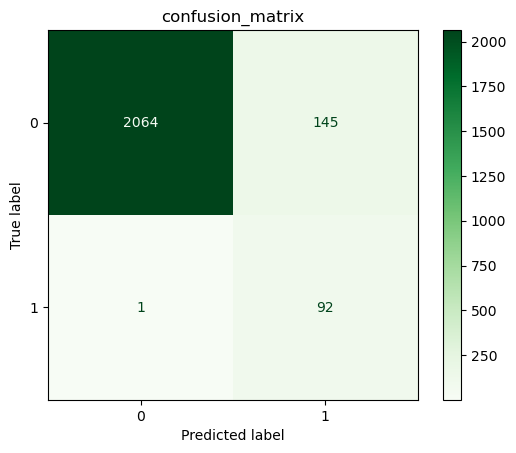

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm1 = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm1)
disp.plot(cmap='Greens')
plt.title('confusion_matrix')
plt.show()

In [14]:
x_new = np.array([56, 20, 1, 40])

y_ans = logistic_model.predict(x_new.reshape(1,-1))
y_ans

array([0], dtype=int64)

In [15]:
##########  Random Forest #########################################

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred_rf= rf.predict(X_test)
y_pred_rf

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
accuracy = accuracy_score(y_pred_rf, y_test)
accuracy

0.9813205907906168

In [20]:
y_test

6456    1
3333    1
5728    0
5391    0
1731    0
       ..
6552    0
5826    0
4392    0
7394    0
947     0
Name: faulty, Length: 2302, dtype: int64

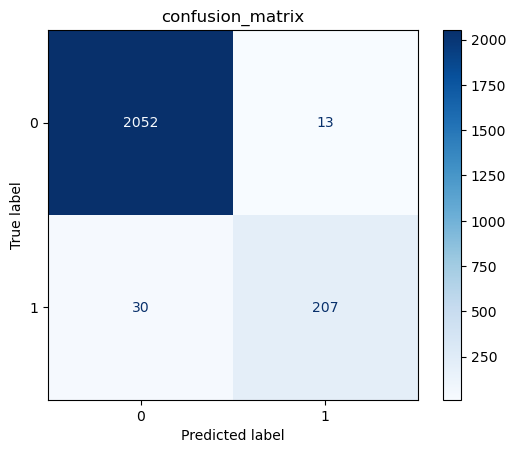

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm2 = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm2)
disp.plot(cmap='Blues')
plt.title('confusion_matrix')
plt.show()

In [22]:
x_new = np.array([56, 20, 1, 40])

y_ans2 = rf.predict(x_new.reshape(1,-1))
y_ans2

array([0], dtype=int64)

In [23]:
######################## SVC #########################################

In [24]:
from sklearn.svm import SVC

In [25]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_pred_svc= svc.predict(X_test)

In [27]:
accuracy3 = accuracy_score(y_test, y_pred_svc)
accuracy3

0.9339704604691572

<function matplotlib.pyplot.show(close=None, block=None)>

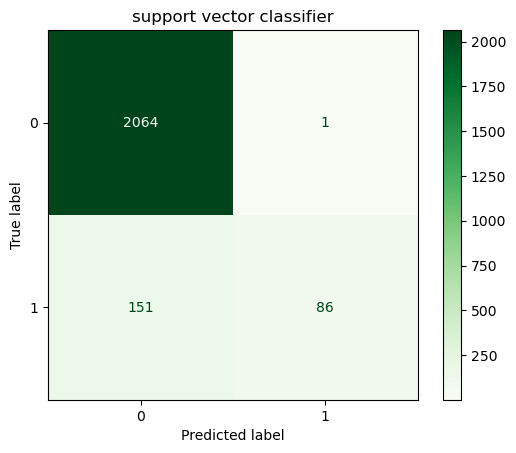

In [28]:
cm3 = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(cm3)
disp.plot(cmap='Greens')
plt.title('support vector classifier')
plt.show

In [29]:
x_new = np.array([56, 20, 1, 40])

y_ans = svc.predict(x_new.reshape(1,-1))
y_ans

array([0], dtype=int64)